# Data loading

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

import joblib
import time

In [2]:

!pip install kaggle
os.environ['KAGGLE_USERNAME'] = "ghazalarzanian"  # replace 'your_username' with your Kaggle username
os.environ['KAGGLE_KEY'] = '9d0b351c849dc8588db228096d30cab6'  # replace 'your_key' with your Kaggle API key


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.6 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102990 sha256=ad08814507cdf812a72476b2dc013fddc17eed327b281d5662e743d9f2c146eb
  Stored in directory: /root/.cache/pip/wheels/00/74/7d/52c235c074504ceced3dee430f10873c95d8a9e81263ece28e
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.9.24
    Not uninstalling certifi at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'certifi'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import kaggle as kg
! kaggle competitions download -c 184702-tu-ml-ss-24-loan

184702-tu-ml-ss-24-loan.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

# Extracting the dataset
with zipfile.ZipFile('184702-tu-ml-ss-24-loan.zip', 'r') as zip_ref:
    zip_ref.extractall('/datasets')

# Listing extracted files
os.listdir('/datasets')

['_deepnote_work',
 'loan-10k.lrn.csv',
 'loan-10k.sol.ex.csv',
 'loan-10k.tes.csv']

In [5]:
# Loading the datasets into variables
train_df = pd.read_csv('/datasets/loan-10k.lrn.csv')
test_df = pd.read_csv('/datasets/loan-10k.tes.csv')
solution_example_df = pd.read_csv('/datasets/loan-10k.sol.ex.csv')

# Displaying the first few rows of the training dataset to understand its structure
train_df

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6644,20000.0,20000.0,20000.0,60 months,16.02,486.58,5 years,OWN,54000.0,...,N,8,2017,11,1991,2,2019,2,2019,C
9996,25910,7500.0,7500.0,7500.0,36 months,9.49,240.22,10+ years,RENT,46386.0,...,N,10,2014,4,2004,3,2017,6,2018,B
9997,95698,20750.0,20750.0,20750.0,60 months,15.05,494.19,< 1 year,RENT,185000.0,...,N,4,2017,2,2004,2,2019,2,2019,C
9998,27371,11000.0,11000.0,11000.0,60 months,16.29,269.20,1 year,RENT,38500.0,...,N,9,2014,8,2006,3,2016,10,2016,D


In [6]:
train_df.dtypes.value_counts()

float64    69
object     14
int64       9
Name: count, dtype: int64

In [7]:
train_df.shape

(10000, 92)

In [8]:
# no missing values in trainig and testing dataset
train_df.isnull().any().any()
test_df.isnull().any().any()

False

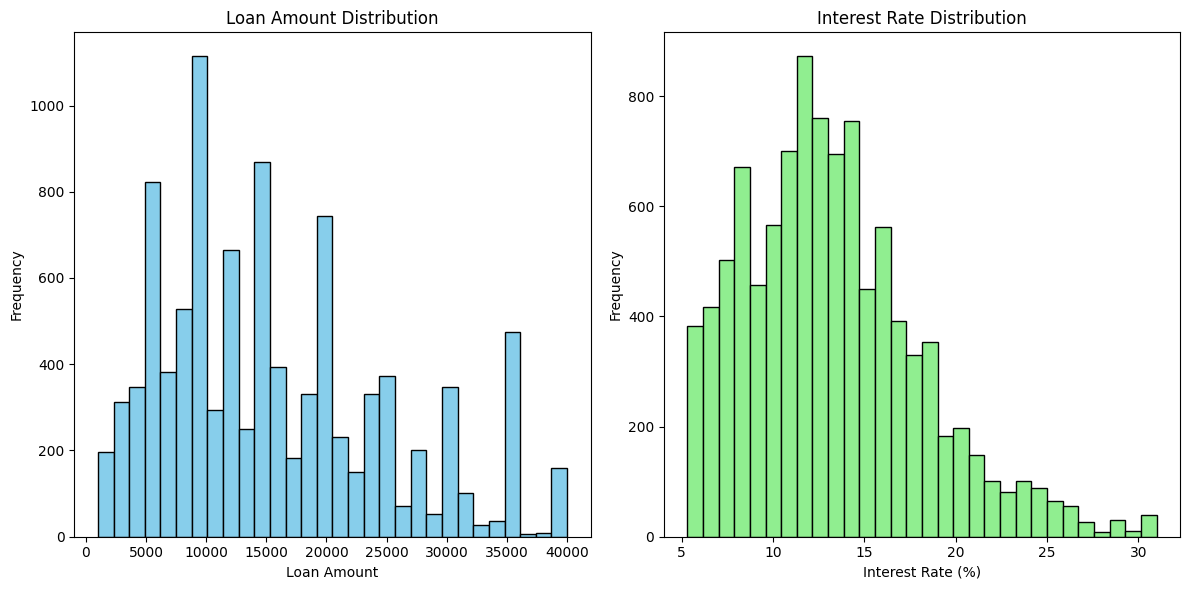

In [9]:
# Plotting histograms for loan_amnt and int_rate
df = train_df.copy()

# Converting 'int_rate' to numeric
df['int_rate'] = df['int_rate'].astype(float)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['int_rate'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

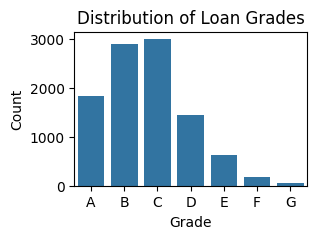

In [10]:
plt.figure(figsize=(3,2))
sns.countplot(data=train_df, x='grade', order=train_df['grade'].sort_values().unique())
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [11]:
train_df['grade'].value_counts()

grade
C    2989
B    2881
A    1821
D    1449
E     621
F     182
G      57
Name: count, dtype: int64

## Splitting data to train and test

In [12]:
constant_columns = train_df.columns[train_df.nunique() == 1]
cols_to_drop = constant_columns.tolist() + ['grade','ID']


# Splitting the extended training dataset into features (X) and target (y)
X = train_df.drop(cols_to_drop, axis=1)
y = train_df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the split data
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((8000, 89), (2000, 89), (8000,), (2000,))

In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.svm import OneClassSVM  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report,confusion_matrix  

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Training the Models without Preprocessing 

In [14]:
# We have to do the one hot encoding for the categorical columns to be able to train the models!!
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), X_train.select_dtypes(include=['object']).columns)
    ], 
    sparse_threshold=0)  

# Models

models = {'SVM': Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', SVC(random_state=42))]),
          'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                           ('model', RandomForestClassifier(random_state=42))]),
          'Naive Bayes': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', GaussianNB())])}
# We want to compare the result with holdout and cross-validation in accuracy and training time

results_with_cv_without_preprocessing = {}
results_holdout_without_preprocessing = {}
training_times = {}  
metrics_scores = {}  

# Cross-validation
for name, model in models.items():
    start_time = time.time() 
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    training_time = time.time() - start_time  
    training_times[name + ' CV'] = training_time  
    results_with_cv_without_preprocessing[name + ' CV'] = cv_scores.mean()
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)  # Predicting with cross-validation to calculate metrics
    metrics_scores[name + ' CV Accuracy'] = accuracy_score(y_train, y_pred_cv)
    metrics_scores[name + ' CV Recall'] = recall_score(y_train, y_pred_cv, average='macro')
    metrics_scores[name + ' CV F1'] = f1_score(y_train, y_pred_cv, average='macro')

# Holdout
for name, model in models.items():
    start_time = time.time()  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    training_time = time.time() - start_time  
    training_times[name + ' Holdout'] = training_time  
    holdout_score = model.score(X_test, y_test)
    results_holdout_without_preprocessing[name + ' Holdout'] = holdout_score
    metrics_scores[name + ' Holdout Accuracy'] = holdout_score
    metrics_scores[name + ' Holdout Recall'] = recall_score(y_test, y_pred, average='macro')
    metrics_scores[name + ' Holdout F1'] = f1_score(y_test, y_pred, average='macro')

print("Results with cross validation and without preprocessig", results_with_cv_without_preprocessing)
print("Results with holdout and without preprocessig", results_holdout_without_preprocessing)
print("Training times", training_times)
print("Metrics scores", metrics_scores)

Results with cross validation and without preprocessig {'SVM CV': 0.386125, 'Random Forest CV': 0.329125, 'Naive Bayes CV': 0.040125}
Results with holdout and without preprocessig {'SVM Holdout': 0.3655, 'Random Forest Holdout': 0.308, 'Naive Bayes Holdout': 0.042}
Training times {'SVM CV': 50.7177848815918, 'Random Forest CV': 6.625712156295776, 'Naive Bayes CV': 0.3527195453643799, 'SVM Holdout': 11.3707275390625, 'Random Forest Holdout': 1.6871609687805176, 'Naive Bayes Holdout': 0.09374713897705078}
Metrics scores {'SVM CV Accuracy': 0.386125, 'SVM CV Recall': 0.20965688177522818, 'SVM CV F1': 0.1867425021003432, 'Random Forest CV Accuracy': 0.329125, 'Random Forest CV Recall': 0.2034743848314717, 'Random Forest CV F1': 0.20412769064492484, 'Naive Bayes CV Accuracy': 0.040125, 'Naive Bayes CV Recall': 0.15359580559489874, 'Naive Bayes CV F1': 0.04835369598823822, 'SVM Holdout Accuracy': 0.3655, 'SVM Holdout Recall': 0.2008401644765375, 'SVM Holdout F1': 0.1774597085503107, 'Random 

# Training the Models with Preprocessing 

In [15]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[ 
    ('scaler', StandardScaler())  # Standardize features 
])

categorical_transformer = Pipeline(steps=[ 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, X_train.select_dtypes(include=['object']).columns)
    ]
)

# Models
models = {'SVM':  Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', SVC(random_state=42))]),
         'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestClassifier(random_state=42))]), 
         'Naive Bayes': Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GaussianNB())])}
                           
results_with_cv_with_preprocessing = {}
results_holdout_with_preprocessing= {}
f1_scores_with_preprocessing = {}

training_times = {}

# Cross-validation 
for name, model in models.items():
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    end_time = time.time()
    duration = end_time - start_time
    training_times[name + ' CV'] = duration
    results_with_cv_with_preprocessing[name + ' CV'] = cv_scores.mean()

# Holdout
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    duration = end_time - start_time
    training_times[name + ' Holdout'] = duration
    holdout_score = model.score(X_test, y_test)
    f1_score_holdout = f1_score(y_test, y_pred, average='weighted')
    results_holdout_with_preprocessing[name + ' Holdout'] = holdout_score
    f1_scores_with_preprocessing[name + ' Holdout F1'] = f1_score_holdout

print("Results with cross validation and with preprocessig",results_with_cv_with_preprocessing)
print("Results with holdout and with preprocessig", results_holdout_with_preprocessing)
print("Training times", training_times)
print("F1 Scores", f1_scores_with_preprocessing)

Results with cross validation and with preprocessig {'SVM CV': 0.8001249999999999, 'Random Forest CV': 0.81375, 'Naive Bayes CV': 0.056499999999999995}
Results with holdout and with preprocessig {'SVM Holdout': 0.792, 'Random Forest Holdout': 0.814, 'Naive Bayes Holdout': 0.052}
Training times {'SVM CV': 37.01663780212402, 'Random Forest CV': 12.910436868667603, 'Naive Bayes CV': 0.4736967086791992, 'SVM Holdout': 11.552370548248291, 'Random Forest Holdout': 4.614008903503418, 'Naive Bayes Holdout': 0.17543578147888184}
F1 Scores {'SVM Holdout F1': 0.7809988491227549, 'Random Forest Holdout F1': 0.7934252236853853, 'Naive Bayes Holdout F1': 0.06534225627026728}


# Using grid-search to improve the models 

In [16]:
# Hyperparameter tuning
param_grids = {
    "Random Forest": {'model__n_estimators': [100,300], 'model__max_depth': [None, 10]},
    "SVM": {'model__C': [0.1, 1], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear']},
    'Naive Bayes': {'model__var_smoothing': np.logspace(0,-9, num=100)}
}
best_params = {}
results_cv = {}
results_holdout = {}
performance_metrics_cv = {}
performance_metrics_holdout = {}

for name, model in models.items(): 
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    joblib.dump(best_model, f"{name}_best_model.pkl")  
    joblib.dump(best_params[name], f"{name}_best_params.pkl") 
    # Training and evaluating with Holdout method
    best_model.fit(X_train, y_train)
    predictions_holdout = best_model.predict(X_test)
    accuracy_holdout = accuracy_score(y_test, predictions_holdout)
    f1_holdout = f1_score(y_test, predictions_holdout, average='weighted')
    results_holdout[name] = accuracy_holdout
    performance_metrics_holdout[name] = {'F1-Score': f1_holdout, 'Accuracy': accuracy_holdout}
    # Cross-validation predictions and metrics
    predictions_cv = cross_val_predict(best_model, X_train, y_train, cv=5)
    accuracy_cv = accuracy_score(y_train, predictions_cv)
    f1_cv = f1_score(y_train, predictions_cv, average='weighted')
    results_cv[name] = accuracy_cv
    performance_metrics_cv[name] = {'F1-Score': f1_cv, 'Accuracy': accuracy_cv}

for name, metrics in performance_metrics_holdout.items():
    print(f"{name} Holdout Performance Metrics:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")

for name, metrics in performance_metrics_cv.items():
    print(f"{name} CV Performance Metrics:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")

print("Best Hyperparameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")

SVM Holdout Performance Metrics:
F1-Score: 0.8638216020635185
Accuracy: 0.8655
Random Forest Holdout Performance Metrics:
F1-Score: 0.7893632649282608
Accuracy: 0.8105
Naive Bayes Holdout Performance Metrics:
F1-Score: 0.41818145532187856
Accuracy: 0.483
SVM CV Performance Metrics:
F1-Score: 0.8740804639649334
Accuracy: 0.875625
Random Forest CV Performance Metrics:
F1-Score: 0.7925227017841228
Accuracy: 0.817
Naive Bayes CV Performance Metrics:
F1-Score: 0.44820802045765834
Accuracy: 0.49975
Best Hyperparameters:
SVM: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Random Forest: {'model__max_depth': None, 'model__n_estimators': 300}
Naive Bayes: {'model__var_smoothing': 0.03511191734215131}


In [17]:
print(f"The default value of model__n_estimators in RandomForestClassifier is {RandomForestClassifier().n_estimators}")
print(f"The default value of model__max_depth in RandomForestClassifier is {RandomForestClassifier().max_depth}")
print(f"The default value of model__C in SVC is {SVC().C:e}")
print(f"The default value of model__gamma in SVC is {SVC().gamma}")
print(f"The default value of model__var_smoothing in GaussianNB is {GaussianNB().var_smoothing:e}")

The default value of model__n_estimators in RandomForestClassifier is 100
The default value of model__max_depth in RandomForestClassifier is None
The default value of model__C in SVC is 1.000000e+00
The default value of model__gamma in SVC is scale
The default value of model__var_smoothing in GaussianNB is 1.000000e-09


# Using feature selection for Naive Bayes

In [18]:
from sklearn.feature_selection import f_classif

best_params = joblib.load('Naive Bayes_best_params.pkl')

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('select_best', SelectKBest(score_func=f_classif, k=10))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('select_best', SelectKBest(score_func=chi2, k=10))  # Adjust k as needed
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X_train.select_dtypes(include=['object']).columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GaussianNB(var_smoothing=best_params['model__var_smoothing']))])

cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
cv_recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall_weighted').mean()
cv_precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision_weighted').mean()
cv_f1_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted').mean()
predicted = cross_val_predict(pipeline, X_train, y_train, cv=5)
conf_matrix = confusion_matrix(y_train, predicted)

print(f'CV Accuracy: {cv_accuracy}')
print(f'CV Recall: {cv_recall}')
print(f'CV Precision: {cv_precision}')
print(f'CV F1 Score: {cv_f1_score}')
print(f'Confusion Matrix:\n{conf_matrix}')

CV Accuracy: 0.7617499999999999
CV Recall: 0.7617499999999999
CV Precision: 0.7612108568056867
CV F1 Score: 0.7609366370502275
Confusion Matrix:
[[1245  215    2    0    2    0    0]
 [ 284 1705  307    2    2    0    0]
 [   3  307 1907  173   12    0    0]
 [   1    4  161  886  102    0    2]
 [   0    0    1  153  275   55    4]
 [   0    0    0    0   66   59   22]
 [   0    0    0    0    3   23   17]]


In [19]:
best_params_svm = joblib.load('SVM_best_model.pkl').get_params()

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', SVC(C=best_params_svm['model__C'],
                                               gamma=best_params_svm['model__gamma'],
                                               kernel=best_params_svm['model__kernel'],
                                               random_state=42))])

model_pipeline.fit(X_train, y_train)
predictions = model_pipeline.predict(test_df.drop('ID', axis=1))


results_df = pd.DataFrame({'ID': test_df['ID'], 'grade': predictions})
results_df.to_csv('Loan.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ede9c305-40ce-4946-a04c-086638645822' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>